# Molecular Dynamics Project


## 1  Introduction

### a) Understanding the potential

#### i) 

Program som plotter potetialet:

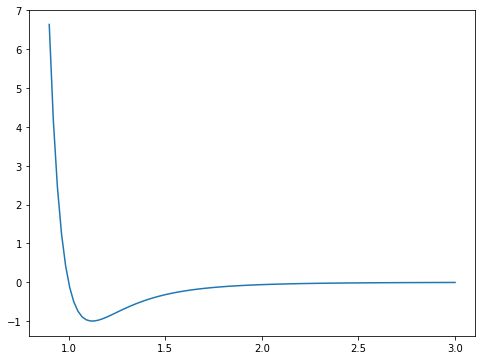

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def U(r, ε, σ):
    return 4*ε*((σ/r)**12 - (σ/r)**6)

r_ray = np.linspace(0.9, 3, 100)
U_ray = U(r_ray, 1, 1)

plt.figure(figsize=(8, 6))
plt.plot(r_ray, U_ray)
plt.show()

#### ii)

Når $r < \sigma$ er $\frac{\sigma}{r} > 1$, så $(\frac{\sigma}{r})^{12}$ dominerer, mens hvis $r > \sigma$ så er $\frac{\sigma}{r} < 1$, og $(\frac{\sigma}{r})^{6}$ blir relativt mye større enn $(\frac{\sigma}{r})^{12}$. Dette fører til at grafen vokser sterk når $r < \sigma$, og synker når $r > \sigma$.

#### iii)

Når $r$ går mot $0$ går $U$ mot $\infty$, når $r$ går mot $\sigma$ går $U$ mot $0$, når $r$ går mot $\sqrt[6]{2}$ har $U$ et bunnpunkt, og når $r$ blir stor går $U$ mot $0$.

#### iv)

Hvis vi har to atomer med en avstand på 1.5σ blir U et negativt tall, så de vil bli tiltrukket til hverandre. Etter hvert vil r bli så lavt at U blir et positivt tall, og de vlil frastøte hverandre. Ettersom total energi er bevart bør ikke atomene stoppe opp, så de vil veksle rundt likevektspunktet i evig tid. Hvis de starter med en avstand på 0.95σ vil de starte med å frastøte hverandre, før de vil tiltrekke hverande og igjen gå frem og tilbake i evig tid.

#### v)

Rett til venste for likevektspunktet er kraften positiv, mens til høyre for likevektspunktet er kraften negativ. Kan jeg tenke på andre krefter med lignende oppførsel?

### b) Forces and equations of motion

#### i)

Vi har to atomer, $i$ og $j$. Disse atomene har positioner $\vec{r}_i$ og $\vec{r}_j$.
Avstanden mellom atomene blir da $r = |\vec{r}_i - \vec{r}_j|$. \
For å gjøre om potensialet til en kraft har man formelen $F(r) = -\frac{dU(r)}{dr}$. \
Deriverer med wolfram alpha: \
$\frac{dU}{dr} = 24\varepsilon\left(\left(\frac{\sigma}{r}\right)^6 - 2\left(\frac{\sigma}{r}\right)^{12}\right)\frac{1}{r}$
Setter så inn formelen til $r = |\vec{r}_i - \vec{r}_j|$ for å få kraften på atom $i$ fra atom $j$:
$$F = -24\varepsilon\left(\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6 - 2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12}\right)\frac{1}{|\vec{r}_i - \vec{r}_j|}$$

#### ii)

For å finne en formel for bevegelsen til atom $i$ må vi først gjøre om kraften vi fant i forigje deloppgave til en kraftvektor. Dette er enkelt, ettersom kraften på atom $i$ fra atom $j$ peker mot $j$, altså er retningsvektoren $\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|}$. Ganger vi dette med formelen for kraften, får vi det endelige uttrykket for kraftvektoren:
$$F \cdot \frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|} 
= -24\varepsilon\left(\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6 - 2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12}\right)\frac{1}{|\vec{r}_i - \vec{r}_j|}\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|} 
= 24\varepsilon\left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2}$$

Ettersom $F = ma$ får $i$ en akselerasjon på $\frac{F}{m} = \frac{24\varepsilon}{m}\left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2}$. For å generalisere denne formelen til flere enn to atomer må vi summere over alle andre atomer, så formelen for bevegelse for atom $i$ er:
$$\frac{24\varepsilon}{m} \sum_{j \neq i} \left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2}$$

### c)    Units

#### i)

\begin{align}
    \vec{r}_i\,' = \vec{r}_i/\sigma &\implies \vec{r}_i = \vec{r}_i\,'\sigma \\
    &\implies |\vec{r}_i - \vec{r}_j| = |\vec{r}_i\,'\sigma - \vec{r}_i\,'\sigma| 
    = |\sigma(\vec{r}_i\,' - \vec{r}_i\,')| = \sigma|\vec{r}_i\,' - \vec{r}_i\,'| \text{ ( ettersom }\sigma\text{ er positiv)}
\end{align}
Bruker dette for å skrive likningen på skalert form:
\begin{align}
    \frac{d^2\vec{r}_i}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{\sigma}{|\vec{r}_i - \vec{r}_j|}
        \right)^{12} - \left(
            \frac{\sigma}{|\vec{r}_i - \vec{r}_j|}
        \right)^6
    \right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2} \\
    \frac{d^2\vec{r}_i\,'\sigma}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{\sigma}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^{12} - \left(
            \frac{\sigma}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^6
    \right)\frac{\sigma(\vec{r}_i\,' - \vec{r}_i\,')}{\sigma^2|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'\sigma}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{1}{|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^{12} - \left(
            \frac{1}{|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^6
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2}
\end{align}

Innfører $t' = t/\tau$:
\begin{align}
    \frac{d^2\vec{r}_i\,'}{dt^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2\tau^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24\tau^2\frac{\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
\end{align}

For å forenkle uttrykket kan vi fjærne $\frac{\varepsilon}{m\sigma^2}$ ved å velge en $\tau$ slik at
$\tau^2 \cdot \frac{\varepsilon}{m\sigma^2} = 1$:
\begin{align}
    &\tau^2 \cdot \frac{\varepsilon}{m\sigma^2} = 1 \\
    &\tau^2 = \frac{m\sigma^2}{\varepsilon} \\
    &\tau = \sqrt{\frac{m\sigma^2}{\varepsilon}}
\end{align}

Hvis vi putter dette inn i likningen får vi vår skalerte likning:
\begin{align}
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24\tau^2\frac{\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24 \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2}
\end{align}

#### ii)

Den karakteristiske tidsskalaen $\tau$ for argon er:
\begin{align}
    \tau &= \sqrt{\frac{m\sigma^2}{\varepsilon}} \\
    & = \sqrt{\frac{39.95 \text{u} \cdot 3.405^2 \text{ Å}^2}{1.0318·10−2 \text{ eV}}} \\
    & = \sqrt{\frac{(39.95 \cdot 1.66 \cdot 10^{-27})\ \text{kg} \cdot (3.405 \cdot 1 \cdot 10^{-10})^2\ \text{m}^2}
        {(1.0318 \cdot 10^{−2} \cdot 1.602 \cdot 10^{-19})\ \text{J}}
        } \\
    & = 2.16 \cdot 10^{-12} \text{ s}
\end{align}
Som er 2.16 picosekunder. \
Enheten til $\tau$ er $\sqrt{\frac{\text{kgm}^2}{\text{J}}} = \sqrt{\frac{\text{kgm}^2}{\text{kgm}^2/\text{s}^2}} = \sqrt{\text{s}^2} = \text{s}$, som gir mening.


## 2 Two-atom simulations

### a) Implementation

#### i)

Skrev et program:

In [2]:
import itertools
import time
import random
from functools import reduce
import matplotlib.pyplot as plt
from vector import Vector3

class Atom:
	def __init__(self, pos, vel=None):
		self.force = Vector3()
		self.acc = Vector3()
		if vel is None:
			self.vel = Vector3()
		self.pos = pos

	def update(self, dt, func="chromer"):
		if func == "chromer":
			self.update_chromer(dt)
		elif func == "euler":
			self.update_euler(dt)
		elif func == "verlet":
			self.update_verlet(dt)
		else:
			print(">:[")

	def update_euler(self, dt):
		"""
		r[i+1] = r[i] + v[i]*dt
		v[i+1] = v[i] + a[i]*dt
		"""
		acc = self.force
		self.pos += self.vel*dt
		self.vel += acc*dt
		self.force.set(0, 0, 0)

	def update_chromer(self, dt):
		"""
		v[i+1] = v[i] + a[i]*dt
		r[i+1] = r[i] + v[i+1]*dt
		"""
		acc = self.force
		self.vel += acc*dt
		self.pos += self.vel*dt
		self.force.set(0, 0, 0)

	def update_verlet(self, dt):
		"""
		v[i] = v[i-1] + 0.5*(a[i-1] + a[i])*dt
		r[i+1] = v[i]*dt + 0.5*a[i]*dt^2
		"""
		acc_prev = self.acc
		acc = self.force.copy()
		self.vel += 0.5*(acc_prev + acc)*dt
		self.pos += self.vel*dt + 0.5*acc*dt**2
		self.acc = acc
		self.force.set(0, 0, 0)

	def length_to(self, atom):
		return (self.pos - atom.pos).length

	def copy(self):
		return Atom(self.pos.copy())

	def __repr__(self):
		return str(self.pos)

def deep_copy(list):
	return [item.copy() for item in list]

def get_force(atom1, atom2):
	between_vec = atom1.pos - atom2.pos
	r_sqrd = between_vec.get_length_sqrd()

	direction_vec = between_vec/r_sqrd
	force = 24*(2*r_sqrd**-6 - r_sqrd**-3)

	return direction_vec*force

def step(dt, update_func):
	global atoms

	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		force = get_force(atom1, atom2)
		atom1.force += force
		atom2.force -= force

	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)

def simulate(dt, t_max, update_func):
	global atoms

	t_list = [0]
	r_list = []
	start_atoms = deep_copy(atoms)

	while t_list[-1] < t_max:
		r_list.append(atoms[0].length_to(atoms[1]))
		step(dt, update_func)
		t_list.append(t_list[-1] + dt)

	atoms = start_atoms
	return t_list[:-1], r_list

Programmet jeg har skrevet er objekt-orientert, jeg har brukt atom-objekter og looper gjennom en liste med disse objektene. Dette gjør at ting ser litt andreledes ut, men jeg mener ihvertfall at det gir mer mening og er mer leselig enn hvis man bare hadde positioner i et stort array. \
Jeg bruker itertools.combinations og newtons 3. lov for å gjøre programmet mer effektivt. (Jeg la senere merke til at det er en del av oppgave 3a, men men). \
Jeg har også endret kraft-funksjonen litt. Jeg bruker $r_{sqrd} = |\vec{r}_i\,' - \vec{r}_i\,'|^2$ istedenfor $r = |\vec{r}_i\,' - \vec{r}_i\,'|$, ettersom dette unngår å finne kvadratroten av mange tall, som er relativt treigt. Det gjør at formelen for kraft mellom to atomer blir $\left(2\left(r_{sqrd}\right)^{-6} - \left(r_{sqrd}\right)^{-3} \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{r_{sqrd}}$.

### b) Motion

#### i) og ii)

Skrev et programm

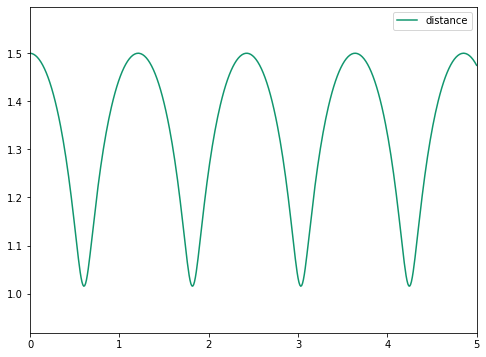

In [3]:
atoms = [
	Atom(Vector3(0, 0, 0)),
	Atom(Vector3(1.5, 0, 0))
]

def main():
	dt = 0.01
	length = 5
	t_list, r_list = simulate(dt, length, "chromer")
	plt.figure(figsize=(8, 6))
	plt.plot(t_list, r_list, color="#11966e", label="distance")
	plt.legend()

	min_r, max_r = min(r_list), max(r_list)
	padding = (max_r-min_r)/5
	plt.axis([0, length, min_r-padding, max_r+padding])
    
	plt.show()
main()

#### iii)

Bevegelsen er som forventet, kulene tiltrekker hverandre helt fram til avstanden nærmer seg $\sigma$, og så frastøter de hverandre. Den totale energien er bevart, så denne bevegelsen vil fortsette i all evighet.

#### iv)

Skrev et programm:

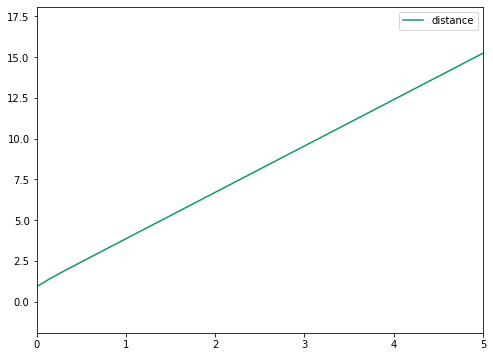

In [4]:
atoms = [
	Atom(Vector3(0, 0, 0)),
	Atom(Vector3(0.95, 0, 0))
]

main()

Her flyr atomene fra hverandre ettersom den potensielle energien kom over 0.

### c) Energy

#### i)

Den kinetiske energien er $E_k = \frac{1}{2}mv^2$, den potensielle energien er $E_p = U(r)$, og den totale energien er $E = E_k + E_p$. \
Endret på programmet slik at det lagrer de ulike energiformene og plotter disse verdiene:

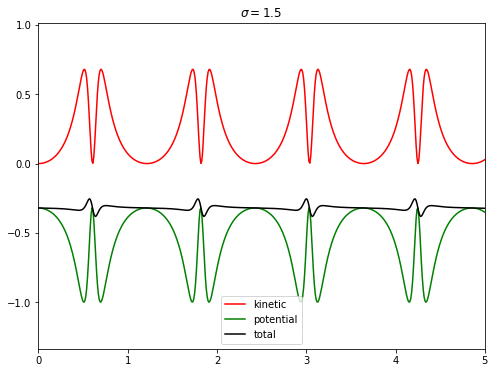

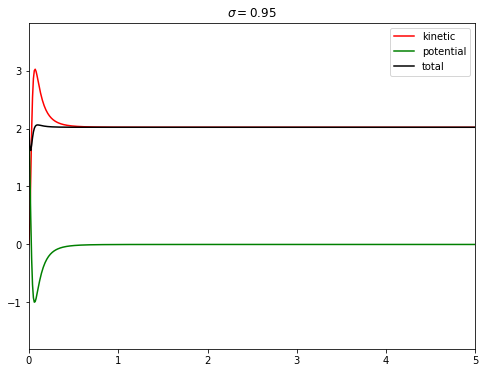

In [5]:
def get_kinetic(speed):
    return 0.5*speed**2

def get_potential(r_sqrd):
    return 4*(r_sqrd**-6 - r_sqrd**-3)

def simulate(dt, t_max, update_func):
	global atoms

	t_list = [0]
	kin_list, pot_list, tot_list = ([] for i in range(3))
	start_atoms = deep_copy(atoms)

	while t_list[-1] < t_max:
		r_sqrd = (atoms[0].pos - atoms[1].pos).get_length_sqrd()

		kin_list.append(sum(get_kinetic(atom.vel.length) for atom in atoms))
		pot_list.append(get_potential(r_sqrd))
		tot_list.append(kin_list[-1] + pot_list[-1])

		step(dt, update_func)
		t_list.append(t_list[-1] + dt)

	atoms = start_atoms
	return t_list[:-1], kin_list, pot_list, tot_list

atoms = [
	Atom(Vector3(0, 0, 0)),
	Atom(Vector3(1.5, 0, 0))
]

def main(title):
	dt = 0.01
	length = 5
	t_list, kin_list, pot_list, tot_list = simulate(dt, length, "chromer")
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]
	plt.figure(figsize=(8, 6))
	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()
	min_value = min(pot_list)
	max_value = max(kin_list)
	buffer = (max_value - min_value)/5
	plt.axis([0, length, min_value-buffer, max_value+buffer])
	plt.title(f"$\\sigma=${title}")
	plt.show()
main("1.5")

atoms = [
	Atom(Vector3(0, 0, 0)),
	Atom(Vector3(0.95, 0, 0))
]
main("0.95")

#### ii)

Den totale energien bør bevares, energien til atomene går ikke over til noen andre former (det er ikke noe luftmotstand eller liknende), og ettersom energi ikke kan forsvinne må den bevares.

### iii)

Programmet mitt gjør ikke dette med en dt på 0.01, men med lavere verdier er den totale energien konstant. Nyaktig hva som går galt med for høy dt vet jeg ikke, men det er ikke uvanlig at høy dt fører til små unyaktigheter.

### iv)

Skrev et programm som plotter med Euler, Euler Chromer og Velocity Verlet:

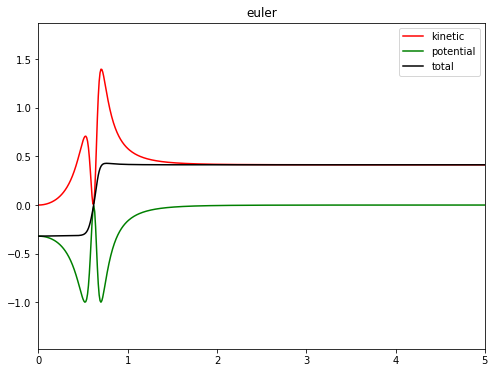

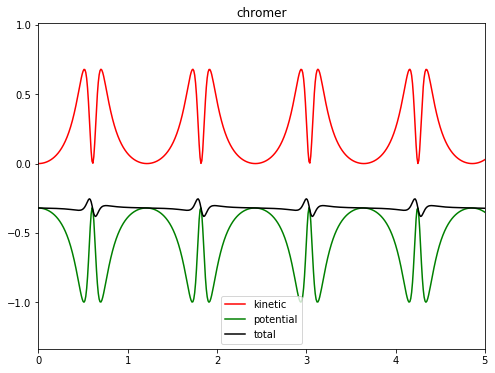

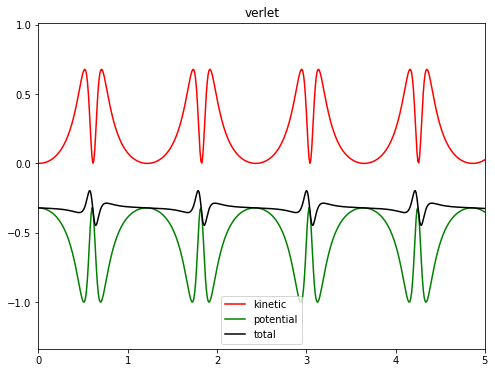

In [6]:
atoms = [
	Atom(Vector3(0, 0, 0)),
	Atom(Vector3(1.5, 0, 0))
]

def main(method):
	dt = 0.01
	length = 5
	t_list, kin_list, pot_list, tot_list = simulate(dt, length, method)
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]
	plt.figure(figsize=(8, 6))
	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()
	min_value = min(pot_list)
	max_value = max(kin_list)
	buffer = (max_value - min_value)/5
	plt.axis([0, length, min_value-buffer, max_value+buffer])
	plt.title(method)
	plt.show()
main("euler")
main("chromer")
main("verlet")

Eulers metode er helt på bærtur, Euler Chromer er best, og velocity verlet er ganske grei.

### v)

Plotter for forskjellige dt verdier:

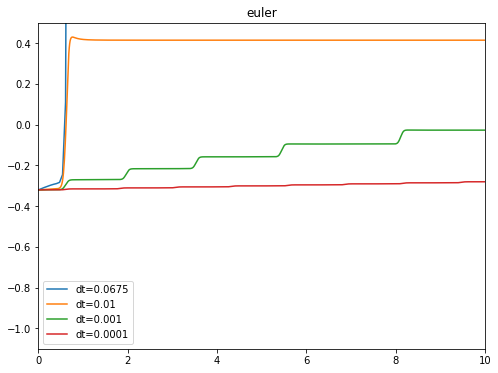

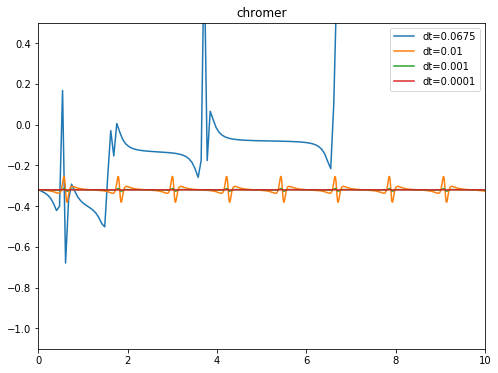

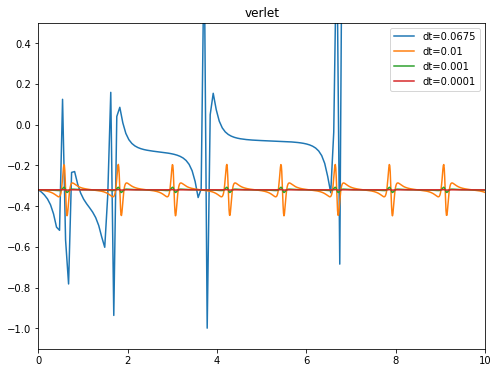

In [7]:
def main(method):
	length = 10

	tot_lists = []
	plt.figure(figsize=(8, 6))
	for i, dt in enumerate([0.0675, 0.01, 0.001, 0.0001]):
		t_list, kin_list, pot_list, tot_list = simulate(dt, length, method)
		tot_lists.append(tot_list)
		plt.plot(t_list, tot_list, label=f"dt={dt}")
	plt.legend()
	plt.title(method)
	plt.axis([0, length, -1.1, 0.5])
	plt.show()
main("euler")
main("chromer")
main("verlet")

Euler er det ikke mye håp for, selv med dt=0.0001 er den totale energien ikke konstant. Både Euler-Chromer og Velocity-Verlet går det bedre med, selv med dt=0.01 er den totale energien gjennomsnittlig konstant, den varierer, men variasjonen er periodisk og like stor i begge retninger. Ved dt=0.001 er denne variasjonen veldig lav, og ved dt=0.0001 er den totale energien så godt som konstant. Det vil si at det ikke egentlig finnes et største tidssteg hvor Euler konserverer energi, men med dt=0.0001 er feilen liten nok til at det ikke er så farlig, mens det største tidssteget som konserverer energi er 0.01 for både Euler-Chromer og Velocity-Verlet.

### vi)

Det virker som om Euler-Chromer er den beste av de tre numeriske metodene, både i nyaktighet og effektivitet. Euler er lett å regne ut for hvert tidssteg, men har lav nyaktighet, mens Euler-Chromer er like lett å regne ut, du bare bytter om rekkefølgen på fart og positon, mens nyaktigheten er mye høyere. Velocity-Verlet virker ca. like nyaktig som Euler-Chromer, men er mer krevende å regne ut, man må ta vare på forrige akselerasjon og gjøre noen ekstra utregninger. Euler-Chromer har altså bare fordeler og ingen ulemper.

### d)

#### i)

La til filskrivingslogikk, det vil si la til en ekstra funksjon i atom-objektet og litt i step-funksjonen og i simulate-funksjonen:

In [8]:
class Atom:
	def __init__(self, pos, vel=None):
		self.force = Vector3()
		self.acc = Vector3()
		if vel is None:
			self.vel = Vector3()
		self.pos = pos

	def update(self, dt, func="chromer"):
		if func == "chromer":
			self.update_chromer(dt)
		elif func == "euler":
			self.update_euler(dt)
		elif func == "verlet":
			self.update_verlet(dt)
		else:
			print(">:[")

	def update_euler(self, dt):
		"""
		r[i+1] = r[i] + v[i]*dt
		v[i+1] = v[i] + a[i]*dt
		"""
		acc = self.force
		self.pos += self.vel*dt
		self.vel += acc*dt
		self.force.set(0, 0, 0)

	def update_chromer(self, dt):
		"""
		v[i+1] = v[i] + a[i]*dt
		r[i+1] = r[i] + v[i+1]*dt
		"""
		acc = self.force
		self.vel += acc*dt
		self.pos += self.vel*dt
		self.force.set(0, 0, 0)

	def update_verlet(self, dt):
		"""
		v[i] = v[i-1] + 0.5*(a[i-1] + a[i])*dt
		r[i+1] = v[i]*dt + 0.5*a[i]*dt^2
		"""
		acc_prev = self.acc
		acc = self.force
		self.vel += 0.5*(acc_prev + acc)*dt
		self.pos += self.vel*dt + 0.5*acc*dt**2
		self.acc = acc
		self.force = Vector3()

	def save_state(self, file):
		file.write(f"Ar {self.pos.x:f} {self.pos.y:f} {self.pos.z:f}\n")

	def length_to(self, atom):
		return (self.pos - atom.pos).length

	def copy(self):
		return Atom(self.pos.copy())

	def __repr__(self):
		return str(self.pos)
atoms = [
	Atom(Vector3(0, 0, 0)),
	Atom(Vector3(1.5, 0, 0))
]

    
def step(dt, update_func, datafile):
	global atoms

	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		force = get_force(atom1, atom2)
		atom1.force += force
		atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)


def simulate(dt, t_max, update_func, filename="data.xyz"):
	global atoms

	t_list = [0]
	r_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename, "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		r_list.append(atoms[0].length_to(atoms[1]))
		step(dt, update_func, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], r_list

#### ii)

Nice

## 3 Large systems

### a) Implementation

#### i)

Løsningen fungerer allerede for N atomer og tar inn startposition og startfart 

#### ii)

Løsningen bruker allerede Newtons tredje lov for å halvere kraftkalkulasjoner

### iii)

Endret på kraftkalkulasjonen slik at atomer med avstand større enn 3 ikke pårvirker hverandre. Jeg bruker fortsatt $r_{sqrd}$, så jeg tester heller om $r_{sqrd}$ er større enn 9:

In [9]:
def get_force(between_vec, r_sqrd):
	direction_vec = between_vec/r_sqrd
	force = 24*(2*r_sqrd**-6 - r_sqrd**-3)

	return direction_vec*force

def step(dt, update_func, datafile):
	global atoms

	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		r_sqrd = between_vec.get_length_sqrd()

		if r_sqrd < 9:
			force = get_force(between_vec, r_sqrd)
			atom1.force += force
			atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)

#### iV)

Dette alene ødelegger energibevarelsen, så jeg må legge til en konstant til U. U(3) = $-\frac{2912}{531441}$, og det er bare å legge til -U(3) = $\frac{2912}{531441}$ til U. Plotter den nye potensialfunksjonen:

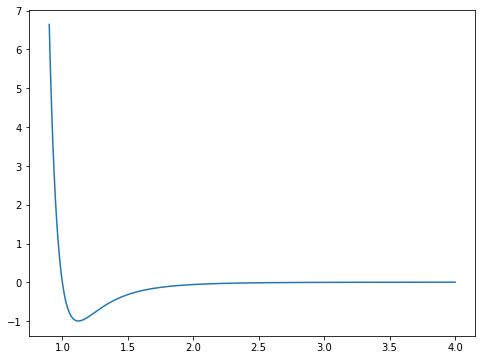

U(3) = 0.0


In [10]:
def U(r):
    return 4*(r**-12 - r**-6) + 2912/531441

r_ray = np.linspace(0.9, 4, 1000)
U_ray = U(r_ray)

plt.figure(figsize=(8, 6))
plt.plot(r_ray, U_ray)
plt.show()

print(f"U(3) = {U(3)}")

#### v)

Ettersom kraften er den deriverte av potensialfunksjonen bør ikke dette gjøre noe forskjell

### b) Verification

#### i)

Strengt tatt unødvendig ettersom jeg ikke har gjordt noen endringer på implementasjonen.

#### ii)

Endret på atom-arrayet og skjørte simuleringen:

In [11]:
atoms = [
	Atom(Vector3(1, 0, 0)),
	Atom(Vector3(0, 1, 0)),
	Atom(Vector3(-1, 0, 0)),
	Atom(Vector3(0, -1, 0))
]

def main(filename):
	dt = 0.01
	length = 5
	simulate(dt, length, "verlet", filename)
main("data3b2.xyz")

#### iii)

Hvordan skal jeg egentlig vise at jeg har visualisert i Ovito?

Ettersom atomene er plassert i en firkant blir draget fra de to nærmeste atomene lagt sammen til et drag mot atomet som er lengst unna, så alle atomene beveger seg rett frem diagonalt mot atomet på den andre siden. Det er altså fortsatt en syklisk bevegelse.

#### iv)

Skrev en mer generisk energikalkulasjonskode og plottet energien i systemet:

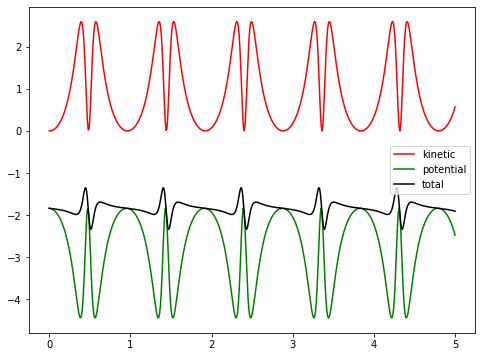

In [12]:
def U(r_sqrd):
	return 4*(r_sqrd**-6 - r_sqrd**-3) + 2912/531441

def get_energy(atoms):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		r_sqrd = between_vec.get_length_sqrd()
		potential_energy += U(r_sqrd)

	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)
    
	return potential_energy, kinetic_energy, potential_energy+kinetic_energy

def simulate(dt, t_max, update_func, filename="data.xyz"):
	global atoms

	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename, "w")

	while t_list[-1] < t_max:
		pot, kin, tot = get_energy(atoms)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)
		step(dt, update_func, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list

def main(filename):
	dt = 0.01
	length = 5
	t_list, pot_list, kin_list, tot_list = simulate(dt, length, "verlet")
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]
	plt.figure(figsize=(8, 6))
	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()
	plt.show()
    
main("data3b2.xyz")

Den totale energien oppfører seg likt som forventet fra plottene i 2c, den totale energien er ikke konstant, men den er syklisk og feilen øker ikke over tid, så det er ikke et problem.

#### v)

Skjørte simuleringen med litt andre initialverdier:

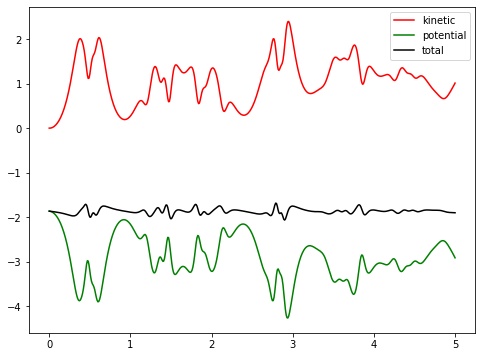

In [13]:
atoms = [
	Atom(Vector3(1, 0.1, 0)),
	Atom(Vector3(0, 1, 0)),
	Atom(Vector3(-1, 0, 0)),
	Atom(Vector3(0, -1, 0))
]

main("data3b5.xyz")

Selv om atomene startet med nesten samme positon som i ii førte den lille forstyrrelsen til at bevegelsen ble kaotisk veldig fort. \
Det er likevel slik at den totale energein er bevart, men energifiguren er mye mer rotete.

### c) Initialisation

#### i)

Skrev et programm som returnerer atompositioner i en krystallstruktur:

In [14]:
def box_positions(n, L):
	d = L/n
	positions = []
	for i in range(0, n):
		for j in range(0, n):
			for k in range(0, n):
				positions.append(Vector3(   i,       j,      k    )*d)
				positions.append(Vector3(   i,    0.5 + j, 0.5 + k)*d)
				positions.append(Vector3(0.5 + i,    j,    0.5 + k)*d)
				positions.append(Vector3(0.5 + i, 0.5 + j,   k    )*d)
	return positions

#### ii)

Skrev et program som lagrer positionsverdiene i en xyz-fil:

In [15]:
positions = box_positions(3, 20)

with open("data/data3c2.xyz", "w") as outfile:
	outfile.write(f"{len(positions)}\ntype x y z\n")
	for position in positions:
		outfile.write(f"Ar {position.x:f} {position.y:f} {position.z:f}\n")

Det ser riktig ut

#### iii)

Volumet til krystallstrukturen er $L^3 = n^3d^3$, mengden atomer i krystallen er $4n^3$. Hvert atom har en masse m, så tettheten blir:
\begin{align*}
    p &= \frac{4n^3m}{n^3d^3} = \frac{4m}{d^3} \\
    \implies d &= \sqrt[3]{\frac{4m}{p}}
\end{align*}
Ettersom $m=39.95 u = 39.95\cdot1.66\cdot10^{-27} kg = 39.95\cdot1.66\cdot10^{-24}$ g, og $p=1.374$ g/cm$^3$, kan man finne p:
\begin{align*}
    d = \sqrt[\LARGE 3]{\frac{4\cdot39.95\cdot1.66\cdot10^{-24} \text{ g}}{1.374 \text{ g/cm}^3}} 
    = 5.78\cdot10^{-8}\text{ cm} = 5.78\cdot10^{-10}\text{ m}
\end{align*}
Vi er interesert i $d = x\sigma \implies x = \frac{d}{\sigma}$, hvor $\sigma = 3.405\cdot10^{-10} \text{m}$:
\begin{align*}
    x = \frac{5.78\cdot10^{-10} \text{ m}}{3.405\cdot10^{-10} \text{ m}} = 1.70 \; \square
\end{align*}

### d)

#### i)

Med 256 atomer begynner programmet å kjøre treigt. Måten jeg har håndtert dette er å bruke pypy, som er en just in time compiler for python er ca. 10 ganger raskere. Dette betyr at jeg ikke kommer til å kjøre programmet i jupyter, så jeg har lagt til at det lagrer energidata i en fil, og så har jeg et program som kan kjøre i jupyter som bare leser den filen og plotter resultatet.

In [16]:
def simulate(dt, t_max, update_func):
	global atoms

	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/data3.xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")
		pot, kin, tot = get_energy(atoms)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)
		step(dt, update_func, datafile)
		t_list.append(t_list[-1] + dt)
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list

atoms = []
for position in box_positions(4, 1.7*4):
	atoms.append(Atom(position))
    
def main():
	dt = 0.01
	length = 5
	t_list, pot_list, kin_list, tot_list = simulate(dt, length, "verlet")
	with open("data/data3d1.energy", "w") as outfile:
		for t, pot, kin, tot in zip(t_list, pot_list, kin_list, tot_list):
			outfile.write(f"{t} {pot} {kin} {tot}\n")

#### ii)

Programmet som leser energi data og plotter det:

In [17]:
def plot_energy(energy_file):
    t_list, pot_list, kin_list, tot_list = [[] for i in range(4)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)

    data_list = [
        ("kinetic", "r", kin_list),
        ("potential", "g", pot_list),
        ("total", "k", tot_list),
    ]
    plt.figure(figsize=(8, 6))
    for name, color, values in data_list:
        plt.plot(t_list, values, color=color, label=name)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.title("Energy plot")
    plt.show()
# plot_energy("data3d1.energy")

Hovedforskjellen jeg kan se her er at den potensielle energien er mye lavere og mer kaotisk. Det er likevel slik at den totale energien er bevart.

### e) Boundary conditions

#### i)

Lagde en funksjon som implementerer periodisk grensetilstandshåndtering, og la til i Atom objektet at atomene teleporterer seg til motsatte side hvis de forlater boksen. Endret også step og get_energy funksjonene slik at de bruker den nye funksjonen, og gjorde at lengden L blir sendt til funksjonene som trenger den. Gir atomene en fart med x, y, z mellom -1 og 1. Bruker random.seed(1) slik at resultatene blir like hver gang programmet kjøres.

In [18]:
def periodic_boundry(between_vec, L):
	dx = between_vec.x
	dx = dx - round(dx/L)*L
	dy = between_vec.y
	dy = dy - round(dy/L)*L
	dz = between_vec.z
	dz = dz - round(dz/L)*L

	direction_vec = Vector3(dx, dy, dz)
	r_sqrd = dx**2 + dy**2 + dz**2

	return direction_vec, r_sqrd

def get_energy(atoms, L):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		direction_vec, r_sqrd = periodic_boundry(between_vec, L)
		potential_energy += U(r_sqrd)

	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy

def step(atoms, dt, update_func, L, datafile):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		direction_vec, r_sqrd = periodic_boundry(between_vec, L)

		if r_sqrd < 3*3:
			force = get_force(direction_vec, r_sqrd)
			atom1.force += force
			atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)
        
def simulate(atoms, dt, t_max, update_func, L):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	# Print total elapsed time
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	# Save final atom positions
	for atom in atoms:
		atom.save_state(datafile)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list

def box_positions(n, d):
	positions = []
	for i in range(0, n):
		for j in range(0, n):
			for k in range(0, n):
				positions.append(Vector3(i, j, k)*d)
				positions.append(Vector3(i, 0.5 + j, 0.5 + k)*d)
				positions.append(Vector3(0.5 + i, j, 0.5 + k)*d)
				positions.append(Vector3(0.5 + i, 0.5 + j, k)*d)
	return positions

def create_atoms(atom_count, d):
	n = int((atom_count**(1/3))/(4**(1/3)))
	L = d*n

	random.seed(1)
	atoms = []
	for position in box_positions(n, d):
		atoms.append(Atom(position, (Vector3(random.random(), random.random(), random.random())*2)-1))

	return L, atoms

#### ii)

Endret på main funksjonen slik at den simulerer med 108 atomer:

In [19]:
def main(filename):
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7)

	t_list, pot_list, kin_list, tot_list = simulate(atoms, dt, length, filename, "verlet", L)
	with open("data/data3e2.energy", "w") as outfile:
		for t, pot, kin, tot in zip(t_list, pot_list, kin_list, tot_list):
			outfile.write(f"{t} {pot} {kin} {tot}\n")
# main("data3eii")

Igjen skjører jeg ikke programmet i jupyter, men leser data fra en fil:

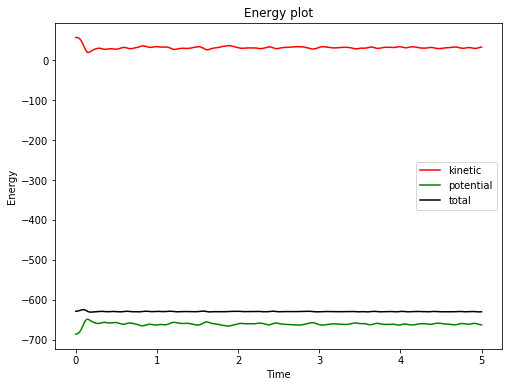

In [20]:
plot_energy("data3eii.energy")

Programmet ser riktig ut, atomene flyr ikke fra hverandre og den totale energien er bevart.

## 4 Science

### a) Temperature

#### i)

La til temperaturkalkulering i simulate funksjonen, lagret temperaturen til en fil og endret på plotte-funksjonen slik at den plotter temperatur:

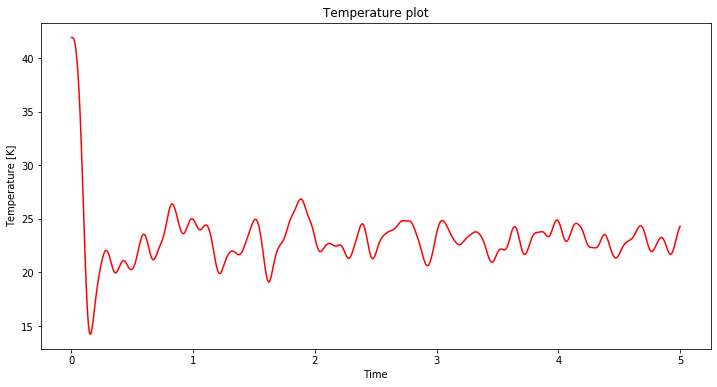

In [21]:
def simulate(atoms, dt, t_max, filename, update_func, L):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list

def main(filename):
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7)

	t_list, pot_list, kin_list, tot_list, tmp_list = simulate(atoms, dt, length, filename, "verlet", L)
	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, pot_list, kin_list, tot_list, tmp_list):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")
# main("data4ai")
            
def plot_temp(energy_file):
    t_list, pot_list, kin_list, tot_list, tmp_list = [[] for i in range(5)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot, temp = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)
            tmp_list.append(temp*119.7)

    plt.figure(figsize=(12, 6))
    plt.plot(t_list, tmp_list, color="r", label="temperature")
    plt.title("Temperature plot")
    plt.ylabel("Temperature [K]")
    plt.xlabel("Time")
    plt.show()

plot_temp("data4ai.energy")

#### ii)

For å gjøre at atomene starter med en spesifik temperatur bruker vi np.random.normal(0, sqrt(T), size=(N,3)). Desverre bruker jeg pypy, så jeg må unngå å bruke numpy. Heldigvis har python sin innebygde random funksjon random.gauss, som fungerer på lignende måte. Endret create_atoms funksjonen slik at den tar inn en temperatur, og endret på main funksjonen slik at den gir en temperatur. Kjører så programmet og plotter temperaturen igjen:

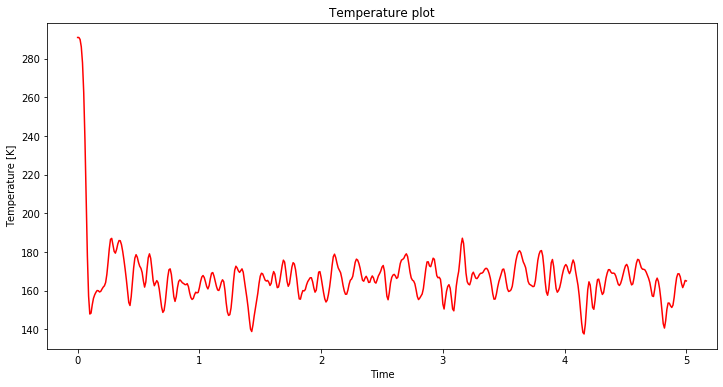

In [22]:
def main():
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7, 300)

	t_list, pot_list, kin_list, tot_list, tmp_list = simulate(atoms, dt, length, "verlet", L)
	with open("data/data4a2.energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, pot_list, kin_list, tot_list, tmp_list):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")


def create_atoms(atom_count, d, temperature):
	n = int((atom_count**(1/3))/(4**(1/3)))
	L = d*n
	atoms = []
	normal = lambda: random.gauss(0, math.sqrt(temperature/119.7))
	positions = box_positions(n, d)
	velocities = [Vector3(normal(), normal(), normal()) for i in range(atom_count)]
	for position, velocity in zip(positions, velocities):
		atoms.append(Atom(position, velocity))

	return L, atoms

plot_temp("data4aii.energy")

Kan se at temperaturen starter på 300 K, og så faller et stykke ned til en likevektstemperatur på ca. 166 kelvin.

#### iii)

For å finne startstemperaturen som fører til en likevektstemperatur på ca. 94.4 K kan man prøve ut verdier til det ser riktig ut. For å gjøre dette enklere la jeg til en kodelinje i plot_temp som printer likevektstemperaturen ved å ta gjennomsnittet av temperaturen etter midtpunktet:

In [23]:
def plot_temp(energy_file):
    t_list, pot_list, kin_list, tot_list, tmp_list = [[] for i in range(5)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot, temp = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)
            tmp_list.append(temp*119.7)
            
    print(f"Equilibrium ~{np.average(tmp_list[int(len(tmp_list)/2):]):.1f} Kelvin") # New

    plt.figure(figsize=(12, 6))
    plt.plot(t_list, tmp_list, color="r", label="temperature")
    plt.title("Temperature plot")
    plt.ylabel("Temperature [K]")
    plt.xlabel("Time")
    plt.show()

Ett problem med å finne en spesifik temperatur hvor likevektstemperatur en ca. 94.4 K er at det er stor variasjon i temperaturen. La til litt logikk som gjør at programmet skjøres 10 ganger, og bruker gjennomsnittsverdiene fra de 10 simulasjonene:

Equilibrium ~93.6 Kelvin


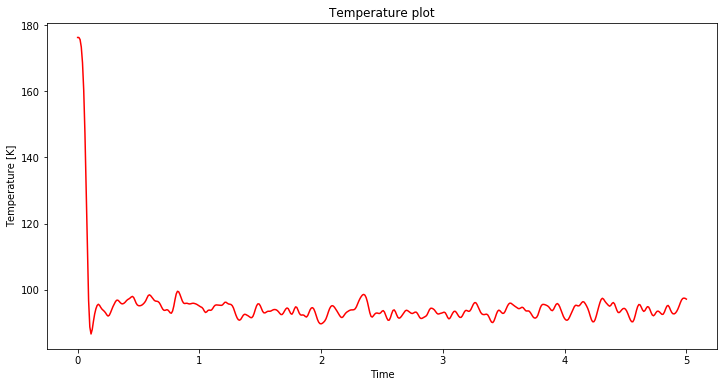

In [24]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(4)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_atoms(108, 1.7, 180)

		t_list, pot_list, kin_list, tot_list, tmp_list = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		for i, (pot, kin, tot, temp) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")
#main("data4aiii", 10)
            
plot_temp("data4aiii.energy")

En starttemperatur på 180 fører til en likevektstemperatur på ca. 94.4 K.

### b) Velocity autocorrelation and diffusion coefficient

#### i)

Endret på simulate slik at den regner ut hastighetsautokorrelasjon, og endret på main slik at den også lagrer vac til en fil:

In [25]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	vac_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		# Calculate and store velocity autocorrelation
		vac = 0
		for atom in atoms:                           # o   o o--o o       o
			vac_emum = atom.vel.dot(atom.vel0)       # |\  | |    |       |
			vac_denom = atom.vel0.get_length_sqrd()  # | \ | O-o  o   o   o 
			vac += vac_emum/vac_denom                # |  \| |     \ / \ / 
		vac = vac/len(atoms)                         # o   o o--o   o   o   
		vac_list.append(vac)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list, vac_list

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(5)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_atoms(256, 1.7, 180)

		t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		for i, (pot, kin, tot, temp, vac) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list, vac_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
			sum_lists[4][i] += vac/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp, vac in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp} {vac}\n")

#### ii)

Skjørte programmet med 256 atomer, endret på plottefunksjonen slik at den også plotter vac:

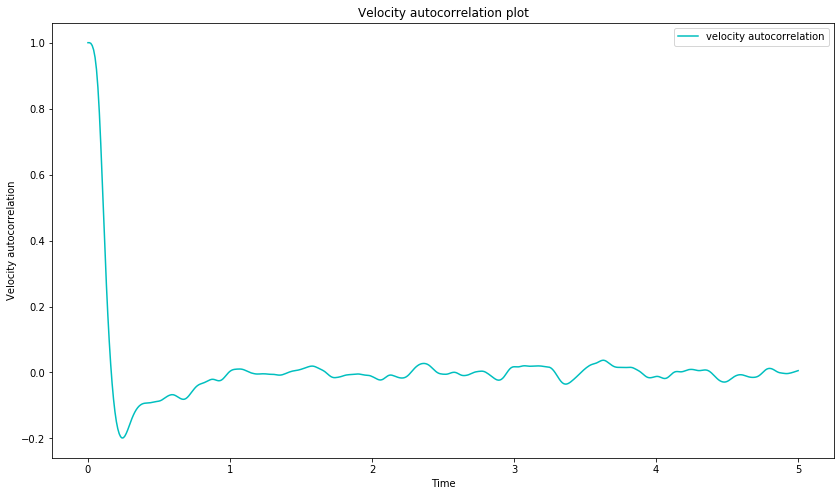

In [26]:
# main("data4bi", 10)

def plotinator(datafile, draw_list=["energy", "temp", "vac"], size=(10, 8)):
	t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = [[] for i in range(6)]
	with open("data/"+datafile, "r") as infile:
		for line in infile:
			t, pot, kin, tot, *temp_vac = (float(v) for v in line.split())
			t_list.append(t)
			pot_list.append(pot)
			kin_list.append(kin)
			tot_list.append(tot)
			if len(temp_vac) == 2:
				vac_list.append(temp_vac[1])
			if len(temp_vac) > 0:
				tmp_list.append(temp_vac[0])

	data_list = {
		"energy": [[
			("kinetic", "r", kin_list),
			("potential", "g", pot_list),
			("total", "k", tot_list),
		], "Energy plot", "Time", "Energy"],
		"temp": [[
			("temperature", "r", tmp_list),
		], "Temperature plot", "Time", "Temperature [K]"],
		"vac": [[
			("velocity autocorrelation", "c", vac_list),
		], "Velocity autocorrelation plot", "Time", "Velocity autocorrelation"],
	}
	fig, axs = plt.subplots(len(draw_list), 1, figsize=(size[0], size[1]), sharex=True, gridspec_kw={'hspace': 0.2})
	if not hasattr(axs, "__getitem__"):
		axs = [axs]
	for i, type in enumerate(draw_list):
		data, title, xlabel, ylabel = data_list[type]
		for name, color, values in data:
			axs[i].plot(t_list, values, color=color, label=name)
		axs[i].set_title(title)
		axs[i].set_ylabel(ylabel)
		if i == len(draw_list)-1:
			axs[i].set_xlabel(xlabel)
	for ax in axs:
		ax.legend()

	plt.show()
    
plotinator("data4bi.energy", ["vac"], (14, 8))

#### iii)

Skrev en funksjon, create_equalibrium_atoms, som kjører simulasjonen en gang og returnerer atom-arrayet etter at simulasjonen har skjørt. Lagde også en foenklet simulasjonsfunksjon, ez_simulate. Gjorde òg at framgangsindikatoren til similate fungerer sammen med den nye framgangsindikatoren til ez_simulate:

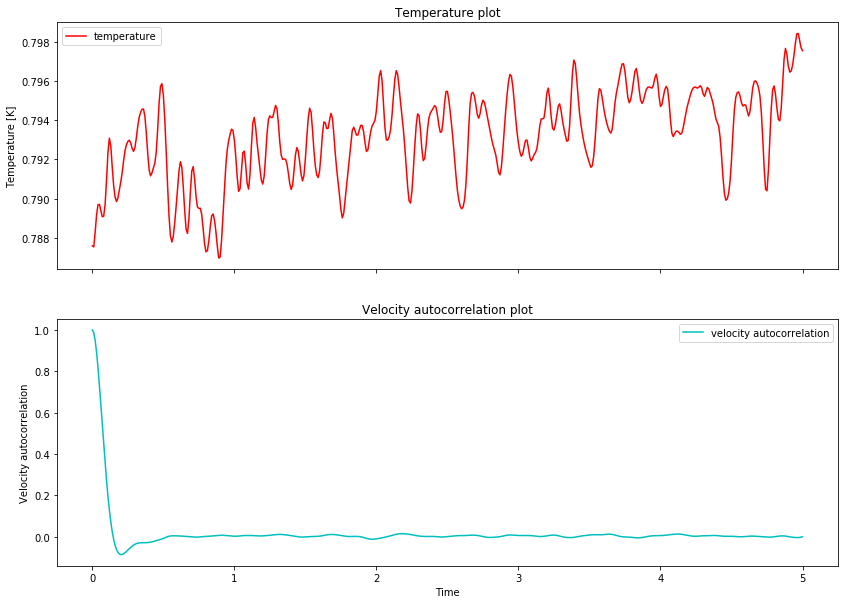

In [27]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	vac_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now even more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{' '*7}{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		# Calculate and store velocity autocorrelation
		vac = 0
		for atom in atoms:
			vac_emum = atom.vel.dot(atom.vel0)
			vac_denom = atom.vel0.get_length_sqrd()
			vac += vac_emum/vac_denom
		vac = vac/len(atoms)
		vac_list.append(vac)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list, vac_list

def ez_simulate(atoms, dt, t_max, update_func, L):
	# Declare variables and save atoms
	t_list = [0]

	datafile = open("data/null", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]*100/t_max) % t_max == 0:
			print(f"\r{'.'*int(t_list[-1]*6/t_max)}", end="")
		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	return atoms

def create_equalibrium_atoms(atom_count, d, temperature, dt, t_max, update_func):
	L, start_atoms = create_atoms(atom_count, d, temperature)
	warm_atoms = ez_simulate(start_atoms, dt, t_max, update_func, L)
	for atom in warm_atoms:
		atom.vel0 = atom.vel.copy()

	return L, warm_atoms

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(5)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_equalibrium_atoms(108, 1.7, 180, dt, length, "verlet")  # New

		t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		for i, (pot, kin, tot, temp, vac) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list, vac_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
			sum_lists[4][i] += vac/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp, vac in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp} {vac}\n")
            
# main("data4biii", 50)

plotinator("data4biii_test.energy", ["temp", "vac"], (14, 10))

Plottet også temperaturen for å se at systemet faktsik startet med en likevektstemperatur. vac-en ser lik ut, men den går litt mindre ned i minus og går opp til rundt 0 raskere.

#### iv)

Jeg har allerede lagdt til gjennomsnittssimuleringslogikk.

#### v)

Skrev et program som leser vac fra en datafil og regner ut diffusjonskoeffisienten. Truker np.trapz for integreringen.

In [28]:
def diffusio_calculo(filename):
	t_list, vac_list = [[] for i in range(2)]
	with open("data/"+filename, "r") as infile:
		for line in infile:
			t, *_, vac = (float(v) for v in line.split())
			t_list.append(t)
			vac_list.append(vac)
        
	I = np.trapz(vac_list, t_list)

	return (1/3)*I

print("Diffusion coefficient:", diffusio_calculo("data4biii.energy"))

Diffusion coefficient: 0.05303207721147


Koeffisienten er nå på dimensjonsløs form, for å konvertere til cm$^2$/s må man gange med: 
$$\frac{\left(3.405\cdot10^{-8} \text{ cm} \right)^2}{2.16 \cdot 10^{-12} \text{ s}} 
= 5.37\cdot10^{-4} \text{ cm}^2\text{/s}$$

Gjør koeffisienten til dimensjonell form:
$$0.053 \cdot 5.37 \cdot 10^{-4} = 2.85 \cdot 10^{-5} \text{ cm}^2\text{/s}$$

Resultatet i [1] var $2.4310 \cdot 10^{-5}$ cm$^2$/s, som er ganske nærme min verdi.

### c) Mean squared displacement and diffusion coefficient

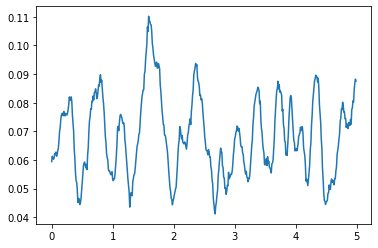

Diffusion coefficient: 0.06835119597896787


In [30]:
def more_diffusio_calculo(filename):
    # Get data
	t_list, msd_list = [[] for i in range(2)]
	with open("data/"+filename, "r") as infile:
		for line in infile:
			t, *_, msd = (float(v) for v in line.split())
			t_list.append(t)
			msd_list.append(msd) 

	# Find derivative
	diff_list = []
	for i in range(len(t_list)-1):
		diff_list.append((msd_list[i+1] - msd_list[i])/(t_list[i+1]-t_list[i]))
        
    # Plot derivative for visualization of D
	plt.plot(t_list[:-1], np.array(diff_list)/6)
	plt.show()
        
    # Return average as D
	return np.average(diff_list)/6

print("Diffusion coefficient:", more_diffusio_calculo("data4ci.energy"))